In [1]:
import matplotlib.pyplot as plt
from astropy.table import Table
import os
import astropy.units as u
import numpy as np

In [2]:
SIM_PATH = '/home/michele/sim/MySimulations/ng/mb.69002_p300_a800_r600/out/'

In [3]:
tbl_ssam = Table.read('/home/michele/sim/analysis/second_ssam_run/m69p3/maps_data_v_w10_r200_a20.fits')

In [4]:
# df = tbl_ssam.to_pandas()

In [5]:
from simulation.parsers.parse_trace import parse_trace
trace = parse_trace(os.path.join(SIM_PATH, 'trace.txt'))

# Sync trace time and snapshot time
# Right is true to keep the last index otherwise it will result in NaN
locations = np.digitize(tbl_ssam['time'], trace.t, right=True)
print(locations.shape)

for f in ['r', 'v', 'a', 'x', 'y', 'z', 'vx', 'vy', 'vz', 'ax', 'ay', 'az']:
    tbl_ssam[f] = trace[f].loc[locations].values

(563,)


In [7]:
d = dict(r=1, wer=34)

In [8]:
d

{'r': 1, 'wer': 34}

In [13]:
'wer' in d

True

In [6]:
tbl_ssam

time,lambda_r,ellip,theta,r_eff_kpc,r_eff_kpc3d,n,Lx,Ly,Lz,mag_v,r,v,a,x,y,z,vx,vy,vz,ax,ay,az
float64,float64,float64,float64,float64,float64,float64,float32,float32,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
8.389990840939879,0.07960333360767856,0.6619739808765824,0.10110568110398646,0.45930986055292244,1.5364205539226532,2.2743627950549126,192741260000.0,189497100000.0,-390604700000.0,-15.481396847526023,598.2941921838157,679.6928887588812,0.006155276046384922,598.29,2.2397099999999996,-2.1029e-05,-392.654,554.802,-0.0104591,-0.00407928,-0.00352102,-0.00297478
8.399992040672968,0.1352107734892394,0.3032914156761094,0.0851133244366653,1.7285753098538068,1.4460793063044548,2.2639097087085247,195002450000.0,189463670000.0,-385015500000.0,-15.371183881156366,594.3690242414655,684.7752120802214,0.006425281281041321,594.318,7.78793,-0.000258676,-401.538,554.693,-0.0372359,-0.00372155,-0.00425644,-0.00305238
8.409993240406056,0.17722479060877444,0.7196102529200341,1.6842982083683216,0.46259895806827245,1.4569151774048805,2.3122719079256058,190836060000.0,189356750000.0,-374815360000.0,-15.431874442357147,590.40860268271,689.8901050168455,0.0062754452299816944,590.258,13.3346,-0.000768188,-410.473,554.491,-0.0647314,0.00059076,-0.00542315,-0.00310188
8.419994440139146,0.2572959664909467,0.29400742058111656,0.0796747660060686,1.733140705280672,1.4864575322717428,2.47673137485981,188669920000.0,192931840000.0,-364458480000.0,-15.538065382873258,586.4119652429602,695.0345220819877,0.007734023091438246,586.1080000000001,18.8787,-0.00155584,-419.461,554.189,-0.0929717,0.00174933,-0.00682866,-0.00318188
8.429995639872235,0.2321792253825613,0.5589983276967166,0.10134653381247191,1.0984192129410815,1.4103828258812428,2.4386352226138115,188199710000.0,185111300000.0,-351903020000.0,-15.566454333939738,582.3839270536937,700.2086554254721,0.009576641617696675,581.872,24.4134,-0.0026309999999999997,-428.505,553.783,-0.122551,0.00273383,-0.00854257,-0.003356
8.439996839605325,0.21157150238072073,0.38257392714232213,0.07444831407016661,1.9076410348244888,1.4290602505207062,2.4861747920513153,190155520000.0,170890740000.0,-333697120000.0,-15.507157573517617,578.3170179559565,705.4231270584029,0.011500548822143228,577.5409999999999,29.9494,-0.00401376,-437.62699999999995,553.2669999999999,-0.154178,0.00340694,-0.0104295,-0.00344687
8.449998039338412,0.1575417890614135,0.5886937848254055,3.0377793801442072,1.6424405131767628,1.353635311126709,2.233519747853279,181236400000.0,162719600000.0,-310272030000.0,-15.553463961173442,574.2151609533328,710.6752946646002,0.013225227070704683,573.118,35.4797,-0.00570718,-446.824,552.637,-0.18358,0.00355181,-0.0124149,-0.00285684
8.459999239071502,0.07771151445500553,0.46905781065788454,3.064351704608539,1.6978883770463917,1.2561445385217667,2.108799908310175,175494580000.0,157823100000.0,-280278930000.0,-15.550613996582454,570.0794908399582,715.9647993823576,0.015068293795516467,568.6030000000001,41.0031,-0.00759842,-456.099,551.887,-0.188108,0.00339128,-0.014661500000000001,0.00077014
8.469989730881965,0.03627301517319904,0.5675730580359253,3.127107615392597,0.741958822777585,1.4047547578811646,2.229445144534111,159500200000.0,152571310000.0,-239334560000.0,-15.502664184462787,565.9146691375225,721.2852223068911,0.01788748552728974,564.0,46.5125,-0.0094224,-465.444,551.012,-0.175038,0.00358947,-0.017406599999999998,0.00202191


In [7]:
WINDOW=20
df['lambda_r_mean'] = df.lambda_r.rolling(window=WINDOW, win_type='gaussian', center=True).mean(std=5)
df['ellip_mean'] = df.ellip.rolling(window=WINDOW, win_type='gaussian', center=True).mean(std=5)

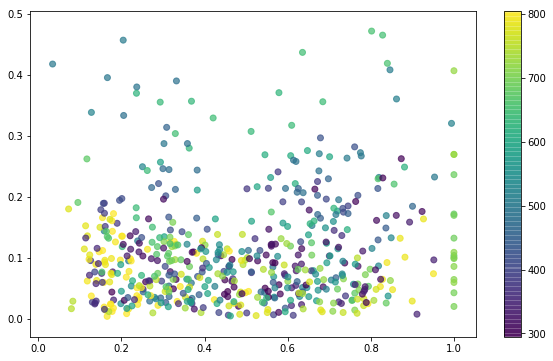

In [8]:
fig, ax = plt.subplots(figsize=(10,6))
im = ax.scatter(df.ellip, df.lambda_r, c=df.r, alpha=0.7)
fig.colorbar(im)

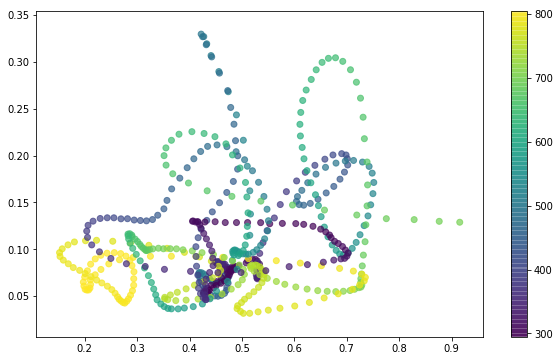

In [11]:
fig, ax = plt.subplots(figsize=(10,6))
im = ax.scatter(df.ellip_mean, df.lambda_r_mean, c=df.r, alpha=0.7)
fig.colorbar(im)

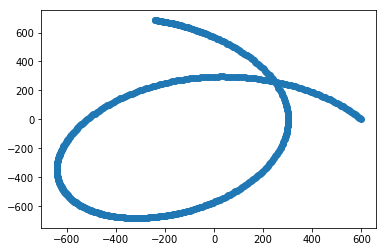

In [12]:
plt.scatter(df.x, df.y)

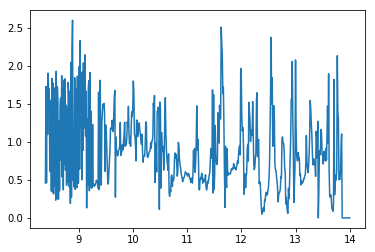

In [14]:
plt.plot(df.time, df.r_eff_kpc)